In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#####################Import the packages 
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pandas import read_csv
from sklearn import preprocessing, cross_validation, svm

import numpy as np
%matplotlib inline

C:\Users\Vivek\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
train = pd.read_csv("transformedTrain.csv")
test = pd.read_csv("transformedtest.csv")

In [5]:
X = train[['Unnamed: 0',
 'Months since Last Donation',
 'Number of Donations',
 'Months since First Donation']]

In [6]:
Y = train[['Made Donation in March 2007']]

In [7]:
X = np.array(train.ix[:,1:4]) 
y = np.array(train['Made Donation in March 2007']) 	# another way of indexing a pandas df


C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 13)
knn = KNeighborsClassifier(n_neighbors=13)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
ac =  accuracy_score(y_test, pred)

print(ac)

0.774869109948


In [10]:
pred


array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train.drop('Made Donation in March 2007',axis=1))
scaled_features = scaler.transform(train.drop('Made Donation in March 2007',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=train.columns[:-1])
df_feat.head()



,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,1.130125,-0.910739,7.772052,7.772052,2.641824
1,1.337729,-1.155586,1.320468,1.320468,-0.249946
2,0.308938,-1.033162,1.843569,1.843569,0.039231
3,-0.987430,-0.910739,2.541038,2.541038,0.452341
4,-0.073975,-1.033162,3.238506,3.238506,1.774293


In [11]:
seed = 1234
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,train['Made Donation in March 2007'],
test_size=0.30)



In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
           

pred = knn.predict(X_test)

#Predicting and evavluations 
#Let's evaluate our knn model.

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))

[[108  26]
 [ 28  11]]


ValueError: x and y must have same first dimension, but have shapes (39,) and (22,)

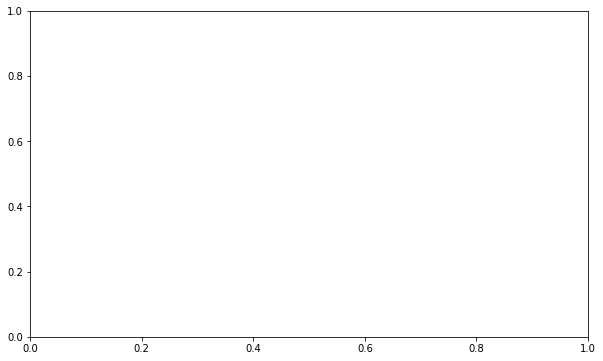

In [13]:
error_rate = []


# Will take some time

for i in range(5,27):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))

plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')

plt.xlabel('K')

plt.ylabel('Error Rate')


In [14]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))


WITH K=1


[[108  26]
 [ 28  11]]


             precision    recall  f1-score   support

          0       0.79      0.81      0.80       134
          1       0.30      0.28      0.29        39

avg / total       0.68      0.69      0.68       173



In [18]:
# NOW WITH K=13
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

#print('WITH K=13')
#print('\n')
#print(confusion_matrix(y_test,pred))
#print('\n')
#print(classification_report(y_test,pred))

len(pred)



173

In [16]:
# NOW WITH K=24
knn = KNeighborsClassifier(n_neighbors=24)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=24')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))





WITH K=24


[[118   7]
 [ 36  12]]


             precision    recall  f1-score   support

          0       0.77      0.94      0.85       125
          1       0.63      0.25      0.36        48

avg / total       0.73      0.75      0.71       173



In [18]:
# NOW WITH K=13
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(pred)
print(classification_report(y_test,pred))



[1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0]
             precision    recall  f1-score   support

          0       0.78      0.90      0.84       125
          1       0.57      0.33      0.42        48

avg / total       0.72      0.75      0.72       173



In [19]:
# NOW WITH K=11
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(pred)
print(classification_report(y_test,pred))

[0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0]
             precision    recall  f1-score   support

          0       0.79      0.92      0.85       125
          1       0.63      0.35      0.45        48

avg / total       0.74      0.76      0.74       173

